Пространственная диффузия инноваций

Торстен Хегерстранд

(См. Википедию): Т. Хегерстранд (Torsten Hägerstrand, 1916—2004) шведский географ.
* пространственная диффузия инноваций,

* хроногеография.
* Работы на шведском. Были мало известны до 1960-х гг.
* Позже идеи Хегерстранда стали разноситься по миру.
* В 1967 г. его книга была переведена на английский и издана
в Чикаго («Диффузия инноваций как географический
процесс»).
Hägerstrand T. (1967) Innovation diffusion as a spatial process.
University of Chicago Press, Chicago.
* Это вызвало волну увлечения диффузионистскими моделями
среди географов Западной Европы и США.

Модель диффузии инноваций

* Агенты располагаются на прямоугольной решётке по в
каждом узле.
* Как только агент узнает об инновации, он ее перенимает.
* Информация распространяется от одного агента к другому.
* Вероятность передачи инновации тем выше, чем ближе
агенты.
* Внутри узла агенты выбираются с равными вероятностями.
* Если выбранный агент уже перенял раньше, то ничего не
происходит.
* Инициализация: ровно 1 агент в одном из узлов знает.

In [1]:
import numpy as np

In [17]:
class InnovationDiffusionModel:
    def __init__(self, grid_size, initial_agents, diffusion_probabilities):
        self.grid_size = grid_size
        self.grid = np.zeros(grid_size, dtype = int)
        for agent in initial_agents:
            self.grid[agent] += 1
        self.diffusion_probabilities = diffusion_probabilities

    def get_neighbors(self, x, y):
        neighbors = []
        for i in range(-2, 3):
            for j in range(-2, 3):
                new_x, new_y = x + i, y + j
                if 0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1]:
                    neighbors.append((new_x, new_y))
        return neighbors

    def propagate_innovation(self, agent_x, agent_y):
        neighbors = self.get_neighbors(agent_x, agent_y)
        for neighbor_x, neighbor_y in neighbors:
            if np.random.rand() < self.diffusion_probabilities[neighbor_x - agent_x + 2, neighbor_y - agent_y + 2]:
                self.grid[neighbor_x, neighbor_y] += 1 

    def simulate_diffusion(self, num_iterations):
        for it in range(num_iterations):
            for agent_x, agent_y in zip(*np.where(self.grid > 0)):
                for _ in range(self.grid[agent_x, agent_y]):
                    self.propagate_innovation(agent_x, agent_y)
        print(f"итерация {it} выполнена!")

    def display_grid(self):
        print(self.grid)

In [23]:
# Инициализация параметров
grid_size = (10, 10)
initial_agents = [(5, 5)]
diffusion_probabilities = np.array([[0.0096, 0.0140, 0.0168, 0.0140, 0.0096],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0168, 0.0547, 0.4431, 0.0547, 0.0168],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0096, 0.0140, 0.0168, 0.0140, 0.0096]])

# Создание модели и запуск симуляции
model = InnovationDiffusionModel(grid_size, initial_agents, diffusion_probabilities)
model.simulate_diffusion(num_iterations=1)
model.display_grid()

итерация 0 выполнена!
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


Нужно добавить модификацию: модель с неизотропным пространством
* Количество агентов в клетке . Пересчитываем
вероятности в зависимости от количества агентов N(x,y):
P(r,s)*N(x+r,y+s) / (sum(P(r,s)*N(x+r,y+s)))
* Добавляем барьеры для передачи инноваций.

In [24]:
class InnovationDiffusionModel:
    def __init__(self, grid_size, initial_agents, diffusion_probabilities, barriers):
        self.grid_size = grid_size
        self.grid = np.zeros(grid_size, dtype=int)
        for agent in initial_agents:
            self.grid[agent] += 1 
        self.diffusion_probabilities = diffusion_probabilities
        self.barriers = barriers

    def get_neighbors(self, x, y):
        neighbors = []
        for i in range(-2, 3):
            for j in range(-2, 3):
                new_x, new_y = x + i, y + j
                if 0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1]:
                    neighbors.append((new_x, new_y))
        return neighbors

    def calculate_modified_probabilities(self, agent_x, agent_y):
        total_agents = np.sum(self.grid[max(agent_x-2, 0):min(agent_x+3, self.grid_size[0]),
                                        max(agent_y-2, 0):min(agent_y+3, self.grid_size[1])])

        modified_probabilities = np.zeros((5, 5))
        for i in range(-2, 3):
            for j in range(-2, 3):
                new_x, new_y = agent_x + i, agent_y + j
                if 0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1]:
                    modified_probabilities[i + 2, j + 2] = self.diffusion_probabilities[i + 2, j + 2] * self.grid[new_x, new_y] / total_agents

        return modified_probabilities / np.sum(modified_probabilities)

    def apply_barrier(self, modified_probabilities, agent_x, agent_y):
        for i in range(-2, 3):
            for j in range(-2, 3):
                new_x, new_y = agent_x + i, agent_y + j
                if 0 <= new_x < self.grid_size[0] and 0 <= new_y < self.grid_size[1]:
                    modified_probabilities[i + 2, j + 2] *= (1 - self.barriers[new_x, new_y])

        return modified_probabilities / np.sum(modified_probabilities)

    def propagate_innovation(self, agent_x, agent_y):
        modified_probabilities = self.calculate_modified_probabilities(agent_x, agent_y)
        modified_probabilities = self.apply_barrier(modified_probabilities, agent_x, agent_y)

        neighbors = self.get_neighbors(agent_x, agent_y)
        for neighbor_x, neighbor_y in neighbors:
            if np.random.rand() < modified_probabilities[neighbor_x - agent_x + 2, neighbor_y - agent_y + 2]:
                self.grid[neighbor_x, neighbor_y] += 1  

    def simulate_diffusion(self, num_iterations):
        for _ in range(num_iterations):
            for agent_x, agent_y in zip(*np.where(self.grid > 0)):
                for _ in range(self.grid[agent_x, agent_y]):
                    self.propagate_innovation(agent_x, agent_y)

    def display_grid(self):
        print(self.grid)

In [25]:
# Инициализация параметров
grid_size = (10, 10)
initial_agents = [(5, 5), (4, 6), (6, 4), (4, 4), (6, 6)]
diffusion_probabilities = np.array([[0.0096, 0.0140, 0.0168, 0.0140, 0.0096],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0168, 0.0547, 0.4431, 0.0547, 0.0168],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0096, 0.0140, 0.0168, 0.0140, 0.0096]])
barriers = np.random.rand(10, 10)  

# Создание модели и запуск симуляции
model = InnovationDiffusionModel(grid_size, initial_agents, diffusion_probabilities, barriers)
model.simulate_diffusion(num_iterations=10)
model.display_grid()

[[   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    8    0 5804    0    0    0]
 [   0    0    0    0    0 4106    0    0    0    0]
 [   0    0    0    0  135    0   40    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [26]:
P = [.0096, .0096, .0096, .0096,
     .0140, .0140, .0140, .0140,
     .0140, .0140, .0140, .0140,
     .0168, .0168, .0168, .0168,
     .0301, .0301, .0301, .0301,
     .0547, .0547, .0547, .0547,
     .4431]
#print(sum(P))
DXDY = [(-2,2),(2,2),(2,-2),(-2,-2),        
        (-2, 1), (2, 1), (2, -1), (-2, -1),
        (-1, 2), (1, 2), (1, -2), (-1, -2),
        (0, 2), (2, 0), (0, -2), (-2, 0),
        (-1, 1), (1, 1), (1, -1), (-1, -1),
        (0, 1), (1, 0), (0, -1), (-1, 0),
        (0, 0)]
#print(DXDY)

dxdy = rd.choices(DXDY, weights=P)[0]

NameError: name 'rd' is not defined

In [53]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class DiffusionSimulation:
    def __init__(self, field_size, diffusion_probabilities, N, num_iterations):
        self.field_size = field_size
        self.diffusion_probabilities = diffusion_probabilities
        self.N = N
        self.num_iterations = num_iterations
        self.field = np.zeros(self.field_size)
        self.dict = self.create_dict()
        self.metrics = pd.DataFrame(columns=['period', 'old_agent', 'new'])

    def create_dict(self):
        return {f'{i},{j}': self.diffusion_probabilities[i][j] for i in range(self.field_size[0]) for j in range(self.field_size[1])}

    def initialize_field(self):
        initial_cell = random.sample(range(self.field_size[0] * self.field_size[1]), 1)[0]
        self.field[initial_cell // self.field_size[1]][initial_cell % self.field_size[1]] = 1

    def simulate_diffusion(self):
        field_size_devided = 1 / self.field_size[0] / self.field_size[1]
        for p in range(self.num_iterations - 1):
            new = 0
            for i in range(self.field_size[0]):
                for j in range(self.field_size[1]):
                    if self.field[i][j] == 0:
                        continue
                    for _ in range(int(self.field[i, j])):
                        neighbor = random.choices(list(self.dict.keys()), weights=list(self.dict.values()), k=1)[0]
                        x_neg, y_neg = map(int, neighbor.split(','))
                        if random.randint(1, self.N) > self.field[x_neg][y_neg]:
                            self.field[x_neg][y_neg] += 1
                            new += 1

            self.metrics.loc[len(self.metrics)] = [p, round(self.field.sum() /  field_size_devided / self.N * 100, 2), new]
            self.plot_field()

    def plot_field(self):
        plt.imshow(self.field, cmap='hot', interpolation='nearest')
        for i in range(self.field_size[0]):
            for j in range(self.field_size[1]):
                plt.annotate(str(self.field[i, j]), xy=(j, i), ha='center', va='center')
        plt.colorbar()
        plt.show()
    
    def plot_first_metrics(self):
        plt.plot(self.metrics['period'], self.metrics['old_agent'])
        plt.xlabel('Period')
        plt.ylabel('Old agent')
        plt.title('Old agent Metric Over Time')
        plt.show()

    def plot_second_metrics(self):
        plt.plot(self.metrics['period'], self.metrics['new'])
        plt.xlabel('Period')
        plt.ylabel('New')
        plt.title('New Metric Over Time')
        plt.show()

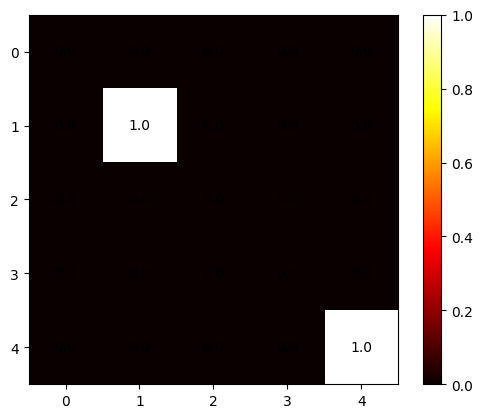

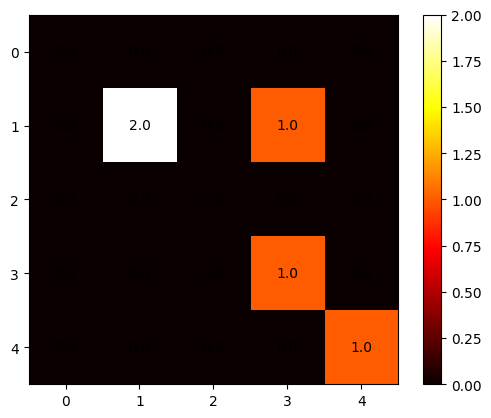

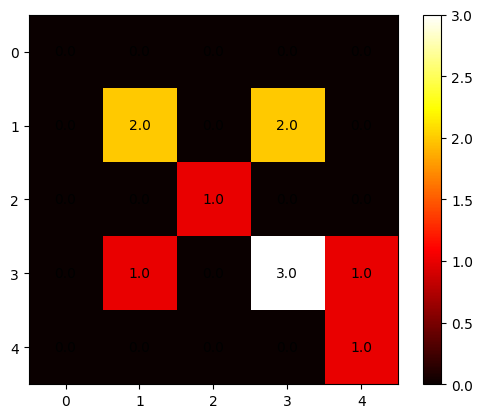

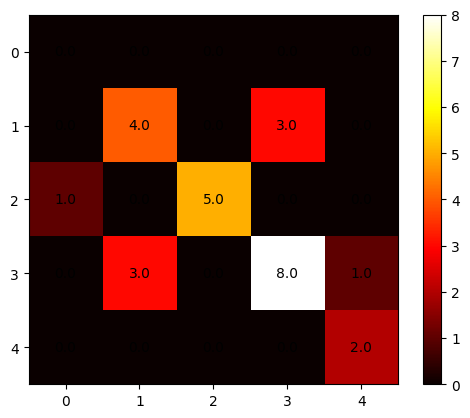

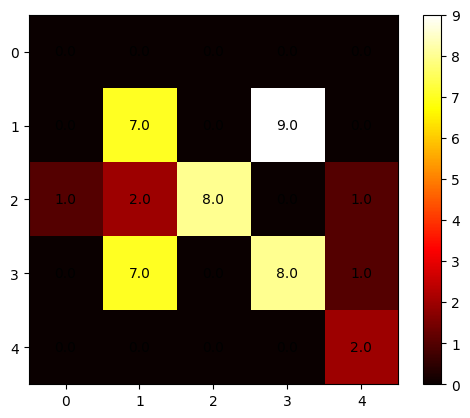

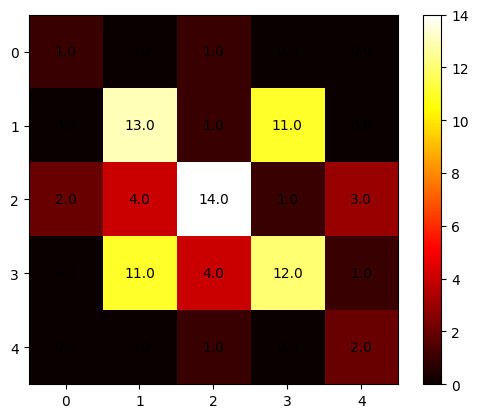

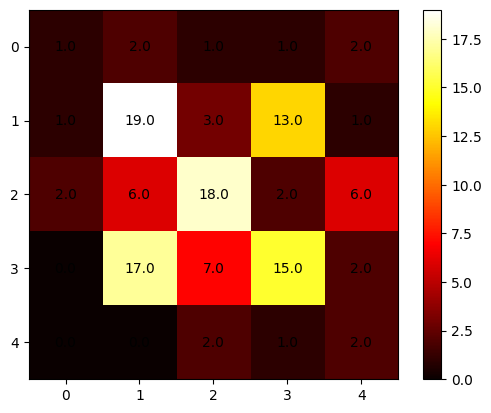

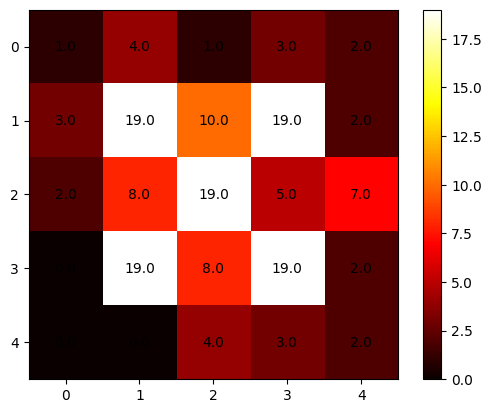

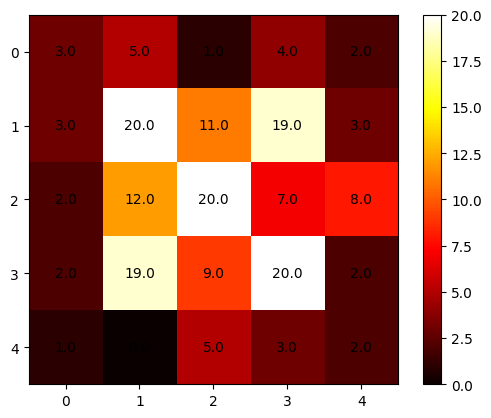

In [54]:
field_size = (5, 5)
N = 20
diffusion_probabilities = np.array([[0.0096, 0.0140, 0.0168, 0.0140, 0.0096],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0168, 0.0547, 0.4431, 0.0547, 0.0168],
                                    [0.0140, 0.301, 0.0547, 0.301, 0.0140],
                                    [0.0096, 0.0140, 0.0168, 0.0140, 0.0096]])

simulator = DiffusionSimulation(field_size, diffusion_probabilities, N, num_iterations = 10)
simulator.initialize_field()
simulator.simulate_diffusion()

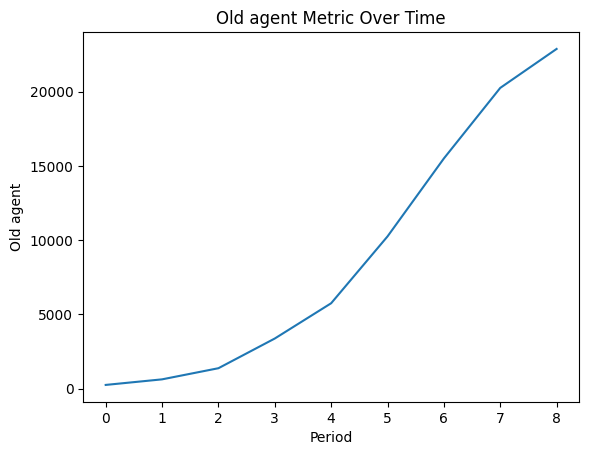

In [55]:
simulator.plot_first_metrics()

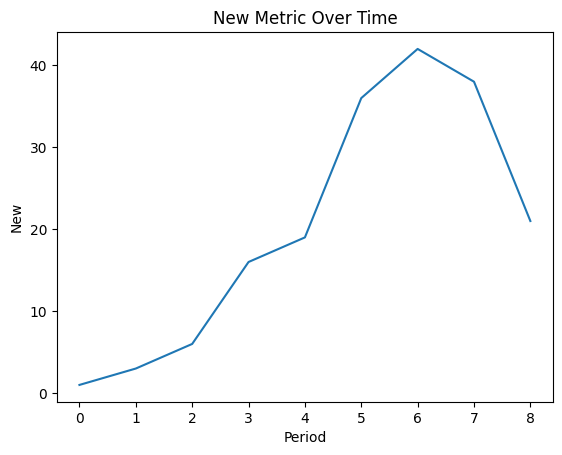

In [56]:
simulator.plot_second_metrics()